In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data_part3_org=pd.read_csv("Part3 - vehicle.csv")

In [3]:
data_part3_org.shape

(846, 19)

In [4]:
data_part3_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
data_part3_org.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

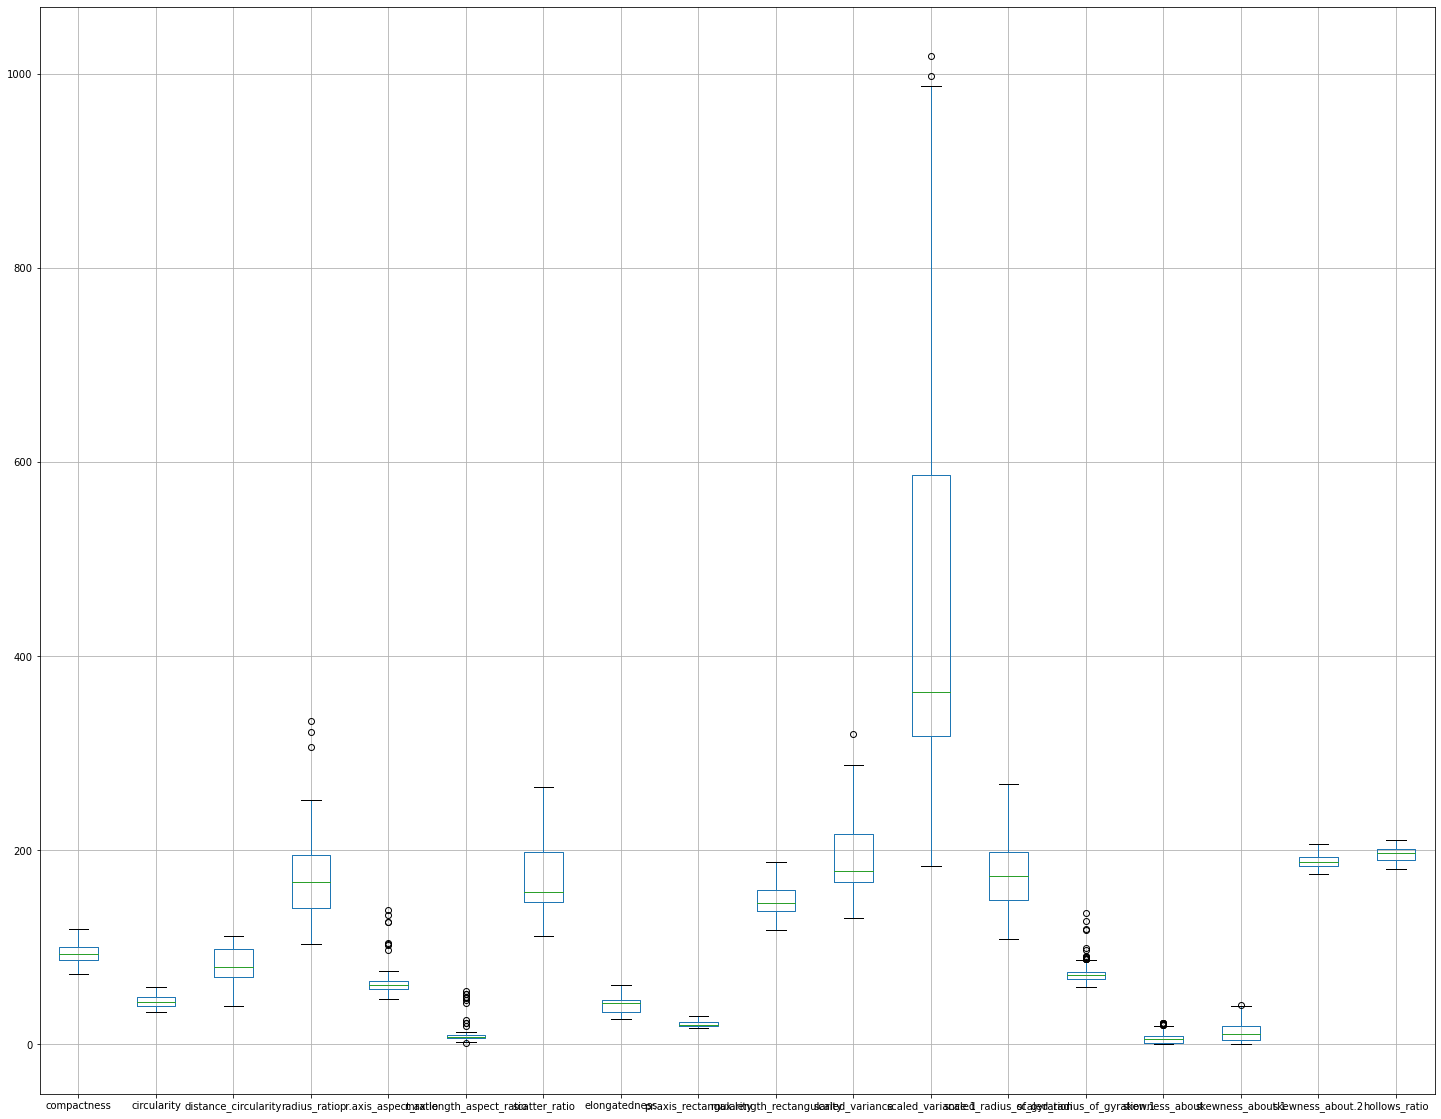

In [6]:
plt.figure(figsize=(25,20))
data_part3_org.boxplot()
plt.show()
plt.close()

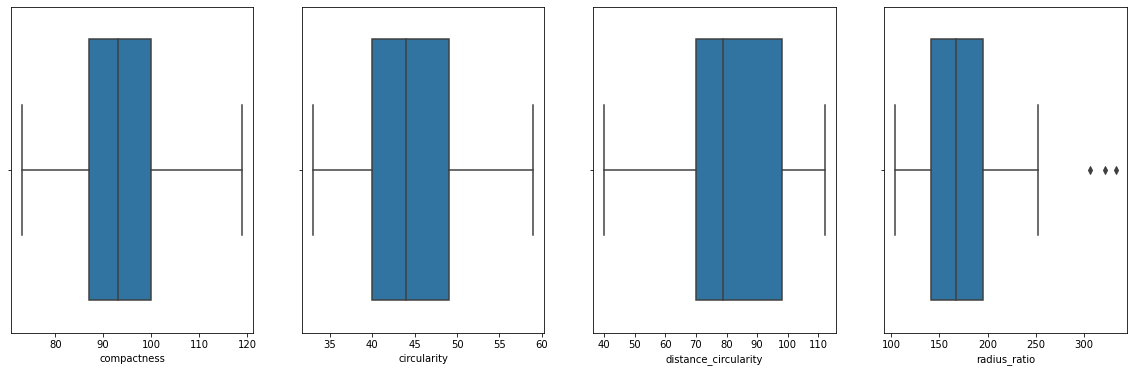

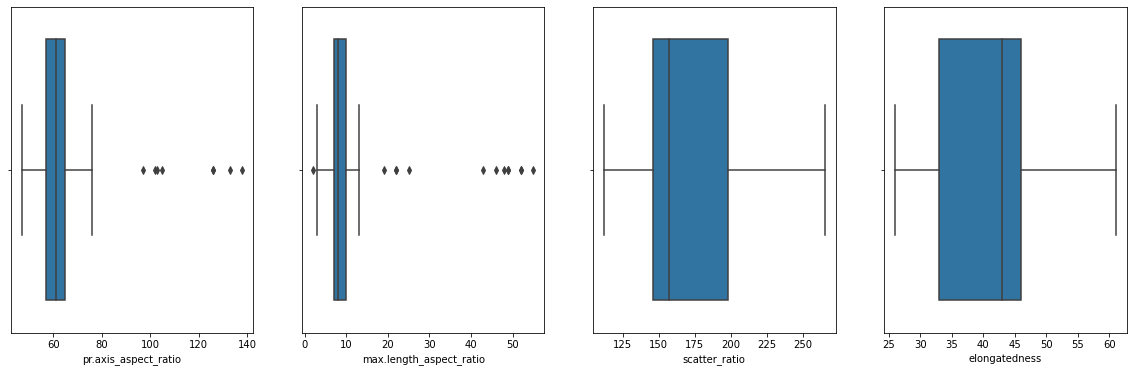

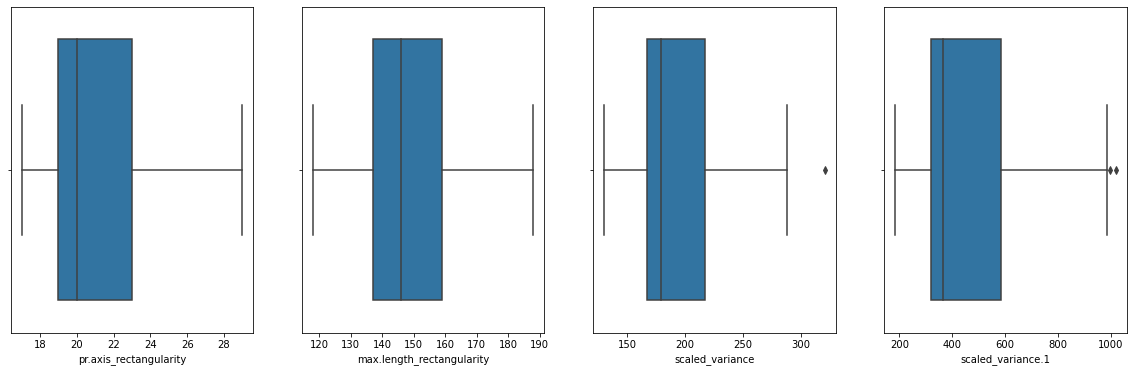

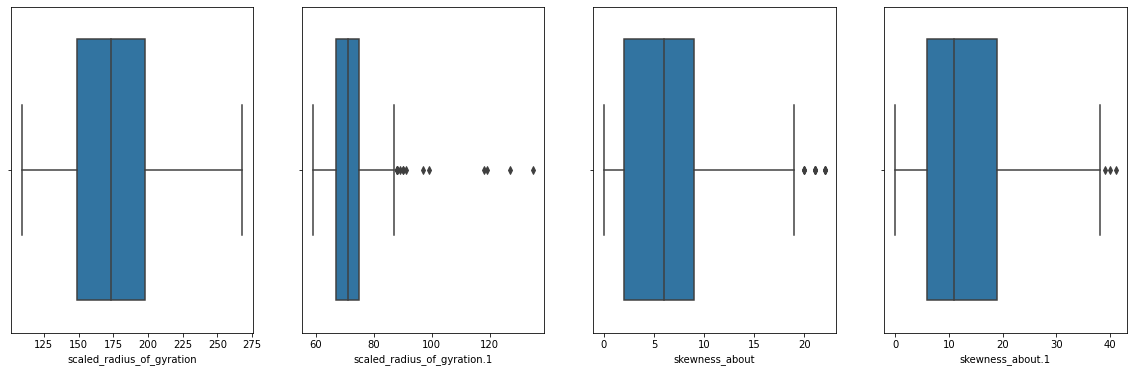

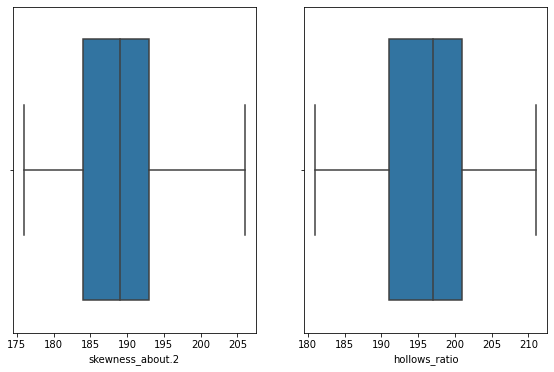

In [7]:

ki=1
data_part3_NaN=data_part3_org.dropna()
#print(data_part3_NaN.drop(["class"],axis=1).columns)
plt.figure(figsize=(20,6))
for col in data_part3_NaN.drop(["class"],axis=1).columns:    
    plt.subplot(1,4,ki)
    #print(ki)
    sns.boxplot(x=data_part3_NaN[col])
    ki=ki+1
    if ki==5:
        ki=1
        plt.show()
        plt.close()
        plt.figure(figsize=(20,6))
    

<AxesSubplot:xlabel='class', ylabel='count'>

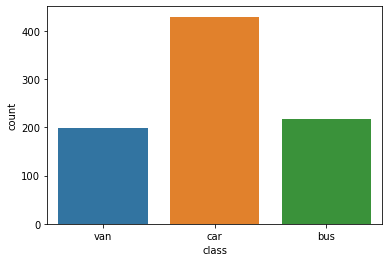

In [8]:
sns.countplot(x=data_part3_org["class"])

In [9]:
data_part3_org[data_part3_org.isna()].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Look like there are some Null values within the data frame.
To treat outliers, we need to know how influential those points are with respect to the data frame. We can check that with the amount of covariance it has with other Quantities within the given data.

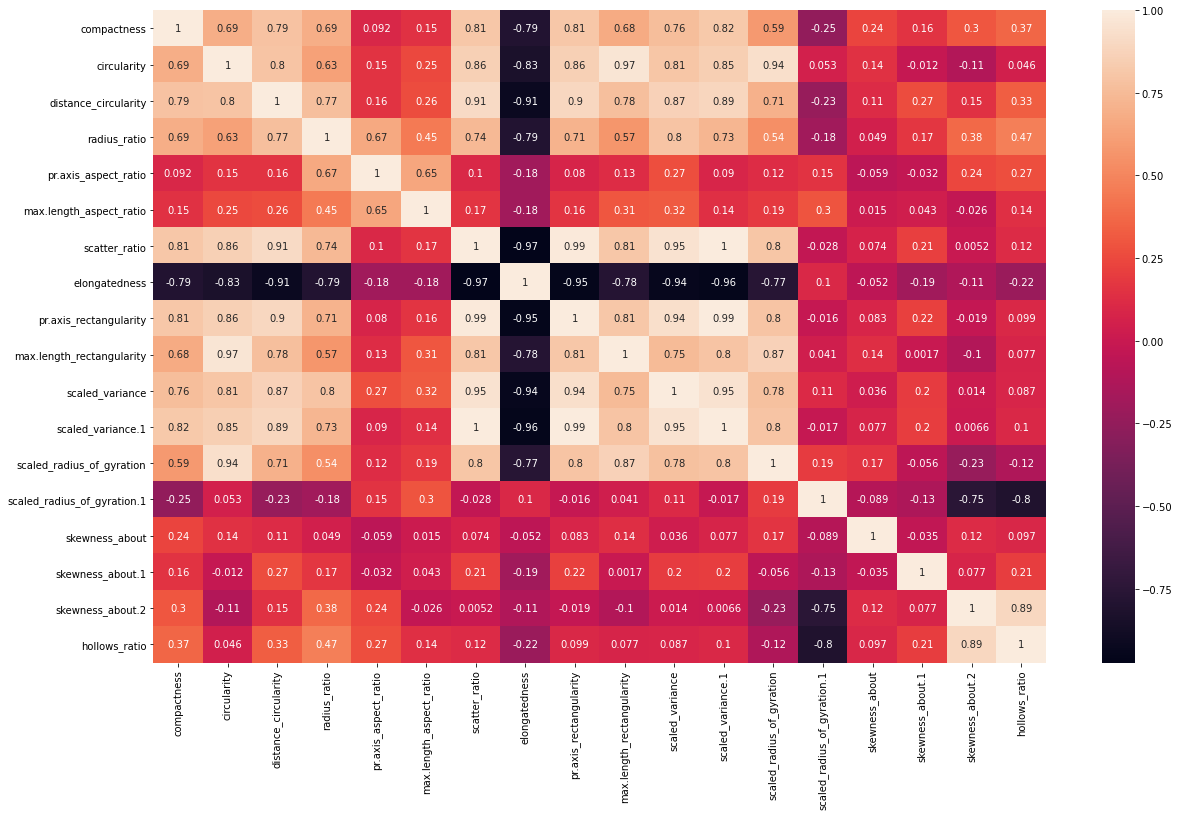

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_org.corr(),annot=True)
plt.show()
plt.close()

In [11]:

data_part3=data_part3_org.copy()
NaN_dict={}
#temporar=0
for col in data_part3.columns:
    NaN_dict.update({col:list(data_part3[data_part3[col].isna()].index)})
    #temporar+=len(NaN_dict[col])
    #print(len(NaN_dict[col]))
#NaN_dict
#print(temporar)

NaN_entries=[]
repeated_entries=[]
for kvalue in NaN_dict:
    for entry in NaN_dict[kvalue]:
        #print(entry)
        if entry in NaN_entries:
            #print("\nrepeated entry",entry)
            if not entry in repeated_entries:
                repeated_entries.append(entry)
        else:
            #print("\nnon-repeated value",entry)
            NaN_entries.append(entry)     
            
            
NaN_entries=sorted(NaN_entries)
repeated_entries=sorted(repeated_entries)

print("There are total NaN Entries for the no of rows is :",len(NaN_entries))

print("The Repeated entries is :",len(repeated_entries))

print("There was also one data point which didn't have three column entries, indexed at location 105")

print("So, total entries that have total NaN values is :",1+len(NaN_entries)+len(repeated_entries))

print("The percentage of these data points consitute around {} %, of the total".format(len(NaN_entries)*100/data_part3.shape[0]))

There are total NaN Entries for the no of rows is : 33
The Repeated entries is : 7
There was also one data point which didn't have three column entries, indexed at location 105
So, total entries that have total NaN values is : 41
The percentage of these data points consitute around 3.900709219858156 %, of the total


In [12]:
#Let us now transform the data using zscore and then go further
from scipy.stats import zscore
data_part3=data_part3_org.drop(["class"],axis=1)

data_part3_car=data_part3[data_part3_org["class"]=="car"]
data_part3_van=data_part3[data_part3_org["class"]=="van"]
data_part3_bus=data_part3[data_part3_org["class"]=="bus"]

In [13]:
data_part3_car.describe().T

count        mean         std    min    25%  \
compactness                  429.0   96.184149    8.732319   73.0   89.0   
circularity                  428.0   46.035047    7.039280   33.0   39.0   
distance_circularity         429.0   88.878788   16.301890   40.0   77.0   
radius_ratio                 426.0  180.591549   31.113868  104.0  158.0   
pr.axis_aspect_ratio         428.0   60.992991    4.631877   50.0   57.0   
max.length_aspect_ratio      429.0    8.825175    2.066583    3.0    7.0   
scatter_ratio                428.0  181.053738   32.042191  112.0  152.0   
elongatedness                428.0   38.093458    7.606890   30.0   31.0   
pr.axis_rectangularity       428.0   21.511682    2.501026   17.0   19.0   
max.length_rectangularity    429.0  149.967366   17.192936  118.0  134.0   
scaled_variance              427.0  197.894614   28.345962  130.0  174.0   
scaled_variance.1            427.0  500.543326  167.936524  184.0  342.5   
scaled_radius_of_gyration    429.0  179.613054   34.206826  114.0  148.0   
scaled_radius_of_gyration.1  426.0   69.924883    5.169958   59.0   66.0   
skewness_about               427.0    7.126464    5.529089    0.0    2.0   
skewness_about.1             428.0   15.170561   10.114167    0.0    6.0   
skewness_about.2             428.0  189.474299    5.277480  176.0  187.0   
hollows_ratio                429.0  197.582751    6.254403  182.0  195.0   

                               50%     75%    max  
compactness                   97.0  103.00  119.0  
circularity                   46.0   53.00   59.0  
distance_circularity          94.0  103.00  112.0  
radius_ratio                 186.0  204.00  234.0  
pr.axis_aspect_ratio          61.0   64.00   74.0  
max.length_aspect_ratio        9.0   11.00   13.0  
scatter_ratio                185.0  212.00  227.0  
elongatedness                 36.0   44.00   61.0  
pr.axis_rectangularity        22.0   24.00   25.0  
max.length_rectangularity    150.0  165.00  188.0  
scaled_variance              206.0  223.00  241.0  
scaled_variance.1            512.0  666.50  757.0  
scaled_radius_of_gyration    182.0  212.00  250.0  
scaled_radius_of_gyration.1   70.0   73.00   87.0  
skewness_about                 6.0   11.00   22.0  
skewness_about.1              14.0   22.25   41.0  
skewness_about.2             189.0  192.00  206.0  
hollows_ratio                198.0  202.00  211.0

In [14]:
data_part3_van.describe().T

count        mean        std    min     25%  \
compactness                  199.0   90.562814   3.872308   82.0   88.00   
circularity                  199.0   42.070352   4.083111   34.0   39.00   
distance_circularity         198.0   73.247475  10.831162   44.0   66.00   
radius_ratio                 198.0  147.176768  29.959771  105.0  132.25   
pr.axis_aspect_ratio         199.0   61.261307  11.380564   48.0   56.00   
max.length_aspect_ratio      199.0    9.713568   7.224633    2.0    7.00   
scatter_ratio                199.0  141.537688  13.995574  114.0  131.00   
elongatedness                199.0   47.939698   4.668439   42.0   44.00   
pr.axis_rectangularity       198.0   18.575758   1.033361   17.0   18.00   
max.length_rectangularity    199.0  145.175879  11.015335  121.0  137.50   
scaled_variance              198.0  163.964646  19.719448  134.0  156.00   
scaled_variance.1            199.0  298.201005  55.894650  194.0  252.00   
scaled_radius_of_gyration    199.0  157.276382  22.821198  109.0  139.00   
scaled_radius_of_gyration.1  199.0   72.778894   8.867222   61.0   67.00   
skewness_about               199.0    6.417085   4.665791    0.0    2.50   
skewness_about.1             199.0    9.698492   6.243344    0.0    5.00   
skewness_about.2             199.0  188.939698   6.379923  176.0  184.00   
hollows_ratio                199.0  196.145729   7.345298  182.0  192.00   

                               50%     75%    max  
compactness                   90.0   93.00  100.0  
circularity                   42.0   46.00   50.0  
distance_circularity          75.0   83.00   92.0  
radius_ratio                 144.0  159.00  333.0  
pr.axis_aspect_ratio          59.0   64.00  138.0  
max.length_aspect_ratio        9.0   10.00   55.0  
scatter_ratio                142.0  155.00  163.0  
elongatedness                 47.0   52.00   58.0  
pr.axis_rectangularity        18.0   19.75   20.0  
max.length_rectangularity    145.0  155.00  170.0  
scaled_variance              164.0  172.00  320.0  
scaled_variance.1            300.0  354.00  389.0  
scaled_radius_of_gyration    159.0  176.00  203.0  
scaled_radius_of_gyration.1   72.0   76.00  135.0  
skewness_about                 6.0    9.00   19.0  
skewness_about.1               9.0   14.00   29.0  
skewness_about.2             188.0  193.00  204.0  
hollows_ratio                196.0  201.00  210.0

In [15]:
data_part3_bus.describe().T

count        mean         std    min    25%  \
compactness                  218.0   91.591743    8.618024   78.0   85.0   
circularity                  214.0   44.981308    4.937128   35.0   42.0   
distance_circularity         215.0   76.767442   12.069575   59.0   69.0   
radius_ratio                 216.0  165.708333   30.543954  113.0  139.0   
pr.axis_aspect_ratio         217.0   63.414747    8.819873   47.0   56.0   
max.length_aspect_ratio      218.0    7.013761    4.757220    4.0    6.0   
scatter_ratio                218.0  170.022936   33.356812  141.0  149.0   
elongatedness                218.0   40.114679    6.501376   26.0   36.0   
pr.axis_rectangularity       217.0   20.580645    2.732553   18.0   19.0   
max.length_rectangularity    218.0  146.701835   10.492398  124.0  142.0   
scaled_variance              218.0  192.889908   33.996568  163.0  170.0   
scaled_variance.1            218.0  448.894495  193.138314  299.0  327.0   
scaled_radius_of_gyration    216.0  181.032407   31.380395  117.0  163.0   
scaled_radius_of_gyration.1  217.0   77.096774    7.692278   65.0   71.0   
skewness_about               214.0    4.794393    3.217436    0.0    2.0   
skewness_about.1             218.0   10.211009    6.872872    0.0    5.0   
skewness_about.2             218.0  187.811927    7.321230  178.0  181.0   
hollows_ratio                218.0  191.325688    7.918326  181.0  184.0   

                               50%     75%     max  
compactness                   89.0   98.00   114.0  
circularity                   44.0   47.00    58.0  
distance_circularity          72.0   80.50   109.0  
radius_ratio                 167.5  188.00   252.0  
pr.axis_aspect_ratio          64.0   69.00   126.0  
max.length_aspect_ratio        6.0    7.00    52.0  
scatter_ratio                152.0  177.75   265.0  
elongatedness                 44.0   45.00    47.0  
pr.axis_rectangularity        19.0   21.00    29.0  
max.length_rectangularity    145.0  149.75   175.0  
scaled_variance              177.0  203.75   288.0  
scaled_variance.1            344.0  486.50  1018.0  
scaled_radius_of_gyration    176.0  191.00   268.0  
scaled_radius_of_gyration.1   76.0   82.00   127.0  
skewness_about                 5.0    7.00    17.0  
skewness_about.1              10.0   14.00    31.0  
skewness_about.2             186.0  195.00   202.0  
hollows_ratio                189.0  198.75   209.0

<AxesSubplot:>

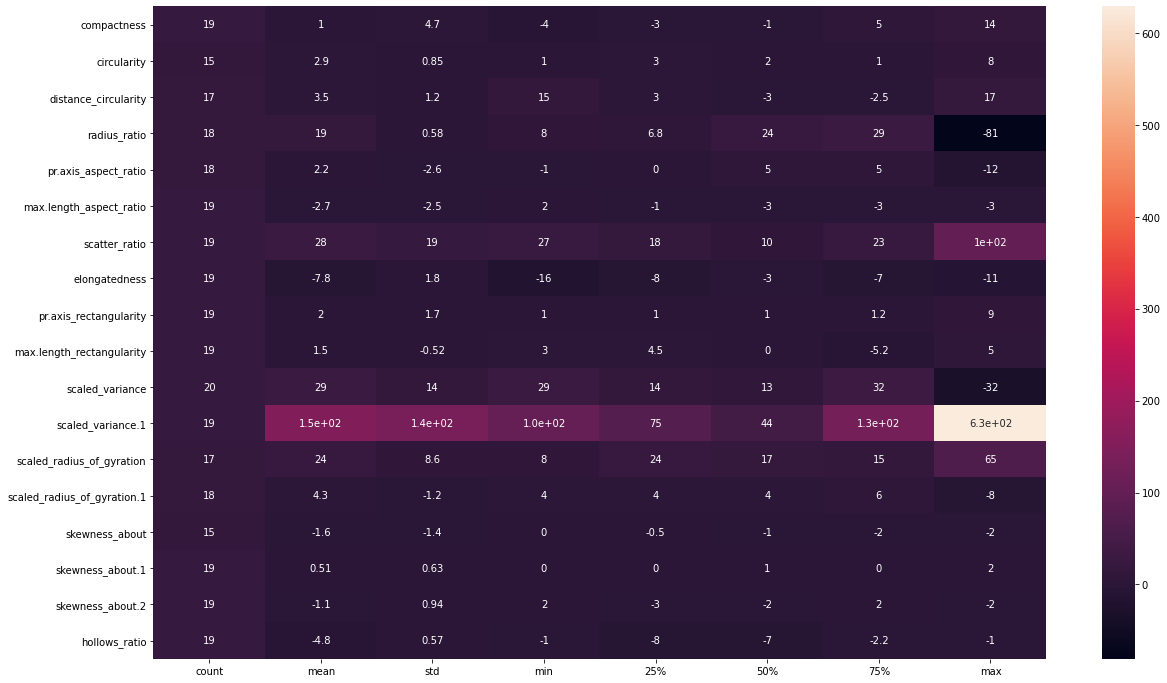

In [16]:
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.describe().T-data_part3_van.describe().T,annot=True)
# Values close to 0 means they make little to no difference for the vehicle being of a particular class.

<AxesSubplot:>

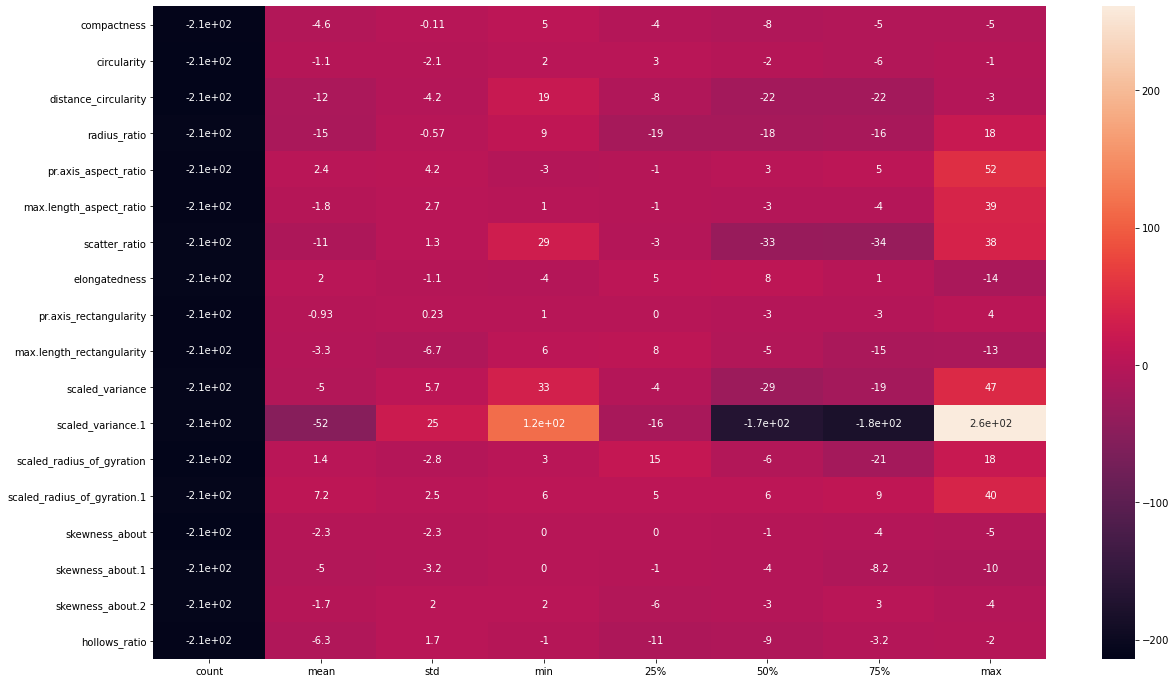

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.describe().T-data_part3_car.describe().T,annot=True)
#Values on either extreme means they make difference for a vehicle being of either type but close to zero means no difference.

<AxesSubplot:>

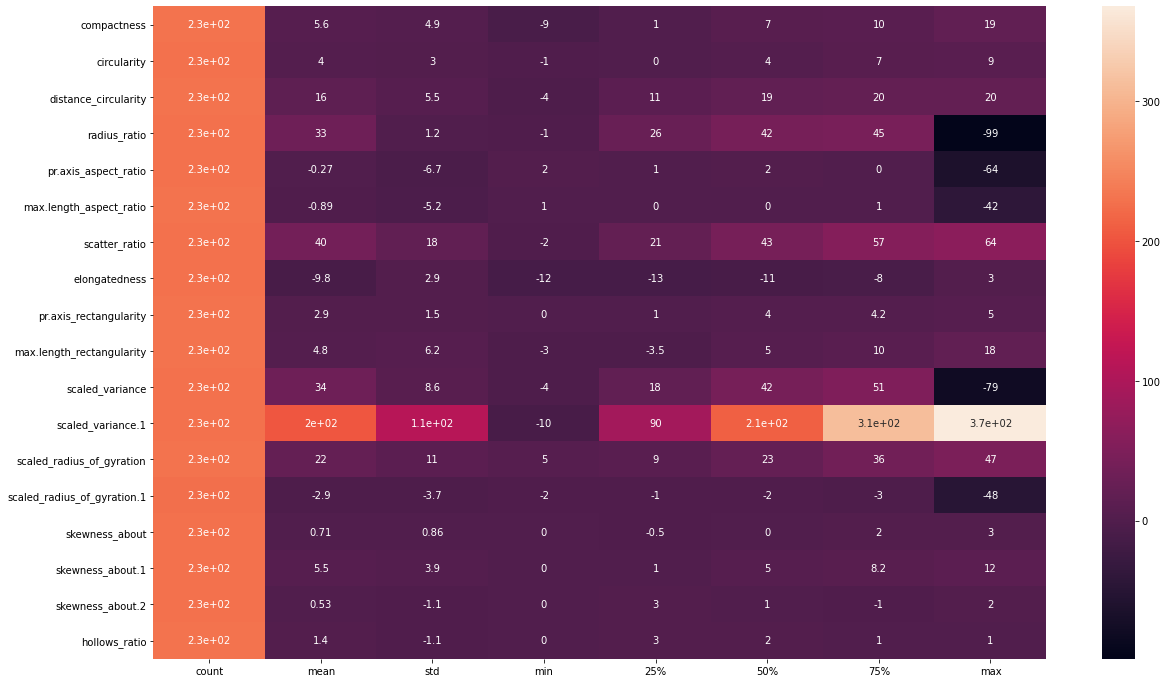

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_car.describe().T-data_part3_van.describe().T,annot=True)
# Values close to 0 means they make little to no difference for the vehicle being of a particular class.

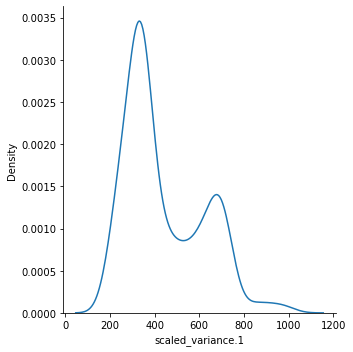

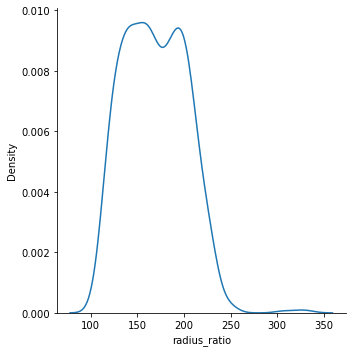

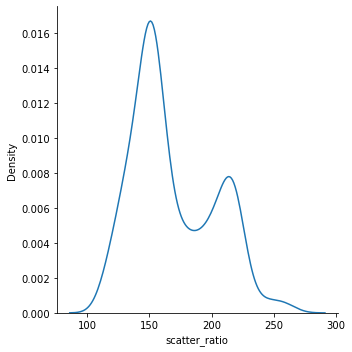

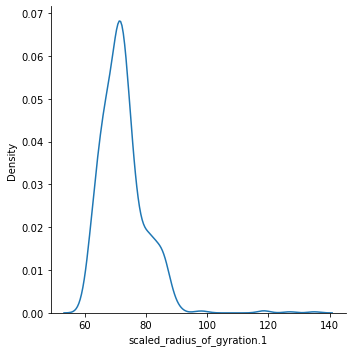

In [19]:
#plt.figure(figsize=(20,6))

#Checking Scaled_varaince.1 distribution
#plt.subplot(1,3,1)
sns.displot(x=data_part3_NaN["scaled_variance.1"],label="scaled_variance.1",kind='kde')

#Checking distribution for radius_ratio
#plt.subplot(1,3,2)
sns.displot(x=data_part3_NaN["radius_ratio"],label="radius_ratio",kind='kde')

#Checking distribution for Scatter_ratio
#plt.subplot(1,3,3)
sns.displot(x=data_part3_NaN["scatter_ratio"],label="scatter_ratio",kind='kde')
plt.show()
plt.close()
#plt.figure(figsize=(20,6))
#plt.subplot(1,3,1)
sns.displot(x=data_part3_NaN["scaled_radius_of_gyration.1"],label="scaled_radius_of_gyration.1",kind='kde')
plt.show()
plt.close()

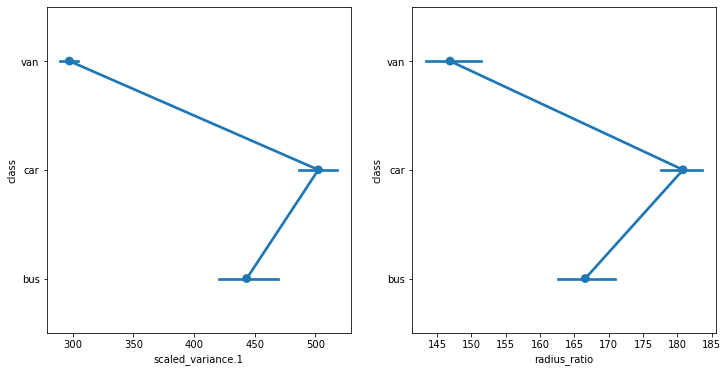

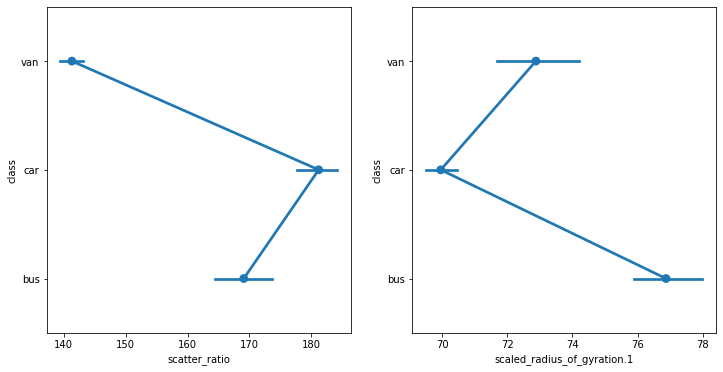

In [20]:
plt.figure(figsize=(12,6))

#Checking Scaled_varaince.1 with class
plt.subplot(1,2,1)
sns.pointplot(x=data_part3_NaN["scaled_variance.1"],y=data_part3_NaN["class"])

#checking radius_ratio with the class
plt.subplot(1,2,2)
sns.pointplot(x=data_part3_NaN["radius_ratio"],y=data_part3_NaN["class"])
plt.show()
plt.close()

plt.figure(figsize=(12,6))
#checking scatter_ratio with the class
plt.subplot(1,2,1)
sns.pointplot(x=data_part3_NaN["scatter_ratio"],y=data_part3_NaN["class"])

#checking scaled_radius_gyration.1
plt.subplot(1,2,2)
sns.pointplot(x=data_part3_NaN["scaled_radius_of_gyration.1"],y=data_part3_NaN["class"])
plt.show()
plt.close()
plt.show()
plt.close()
#Noting here how scaled variance is different for different classes of vehicles.


But there are not two peaks that are significantly different indicating that possibly there is not much difference in radius ratio but still there is a little two peaks.


Noting here how radius ratio is where the clear divisions are noted.

**Observations:** 
Here we have observed that the differences among all features between bus and van are not much but the difference between those of car and bus are significant, and are not just omnidirectional. They are both enhancements and deprecations. Particularly if we view it in a lot more detail.
1. The maximum scaled variance differs significantly in all three types of models meaning that a bigger model like bus is likely to have a bigger amount of scaled variance than for much smaller vehicles.
2. So, while classification, it is most likely the decisive variable that dictates whether a given vehicle is a car, a van or a bus.
3. There are as many number of cars as there are buses and vans combined.

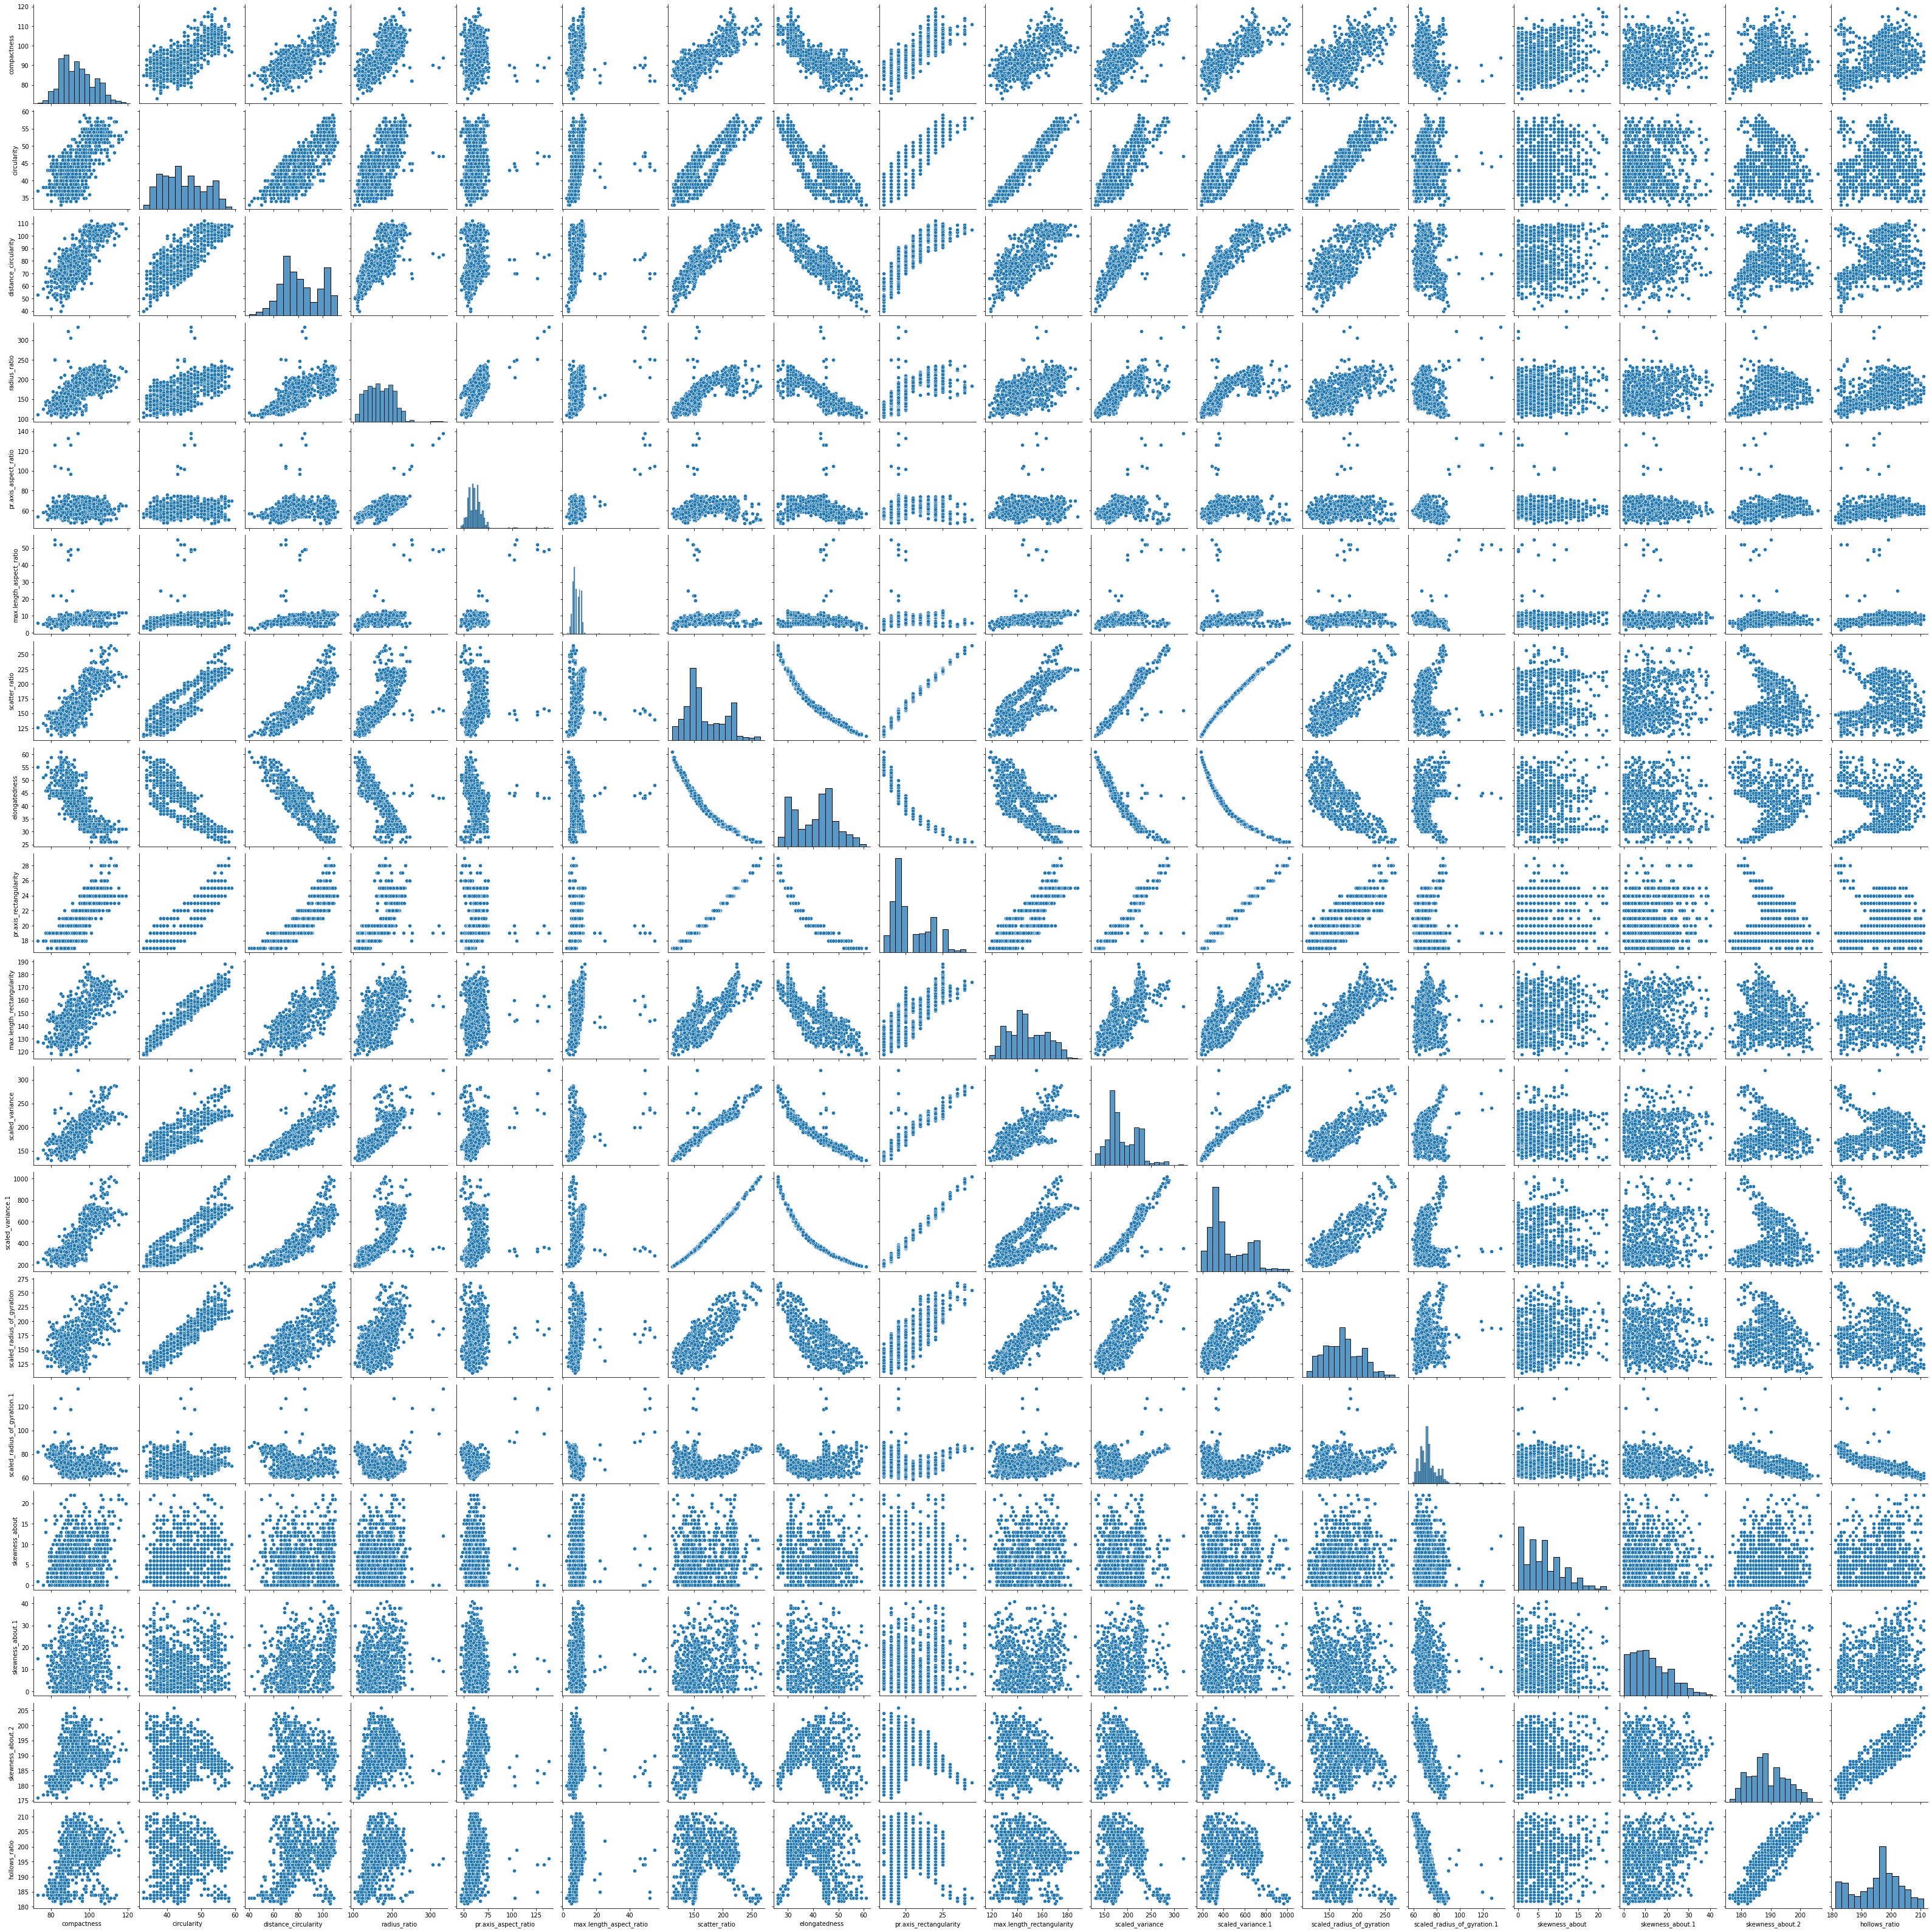

In [21]:
sns.pairplot(data_part3)

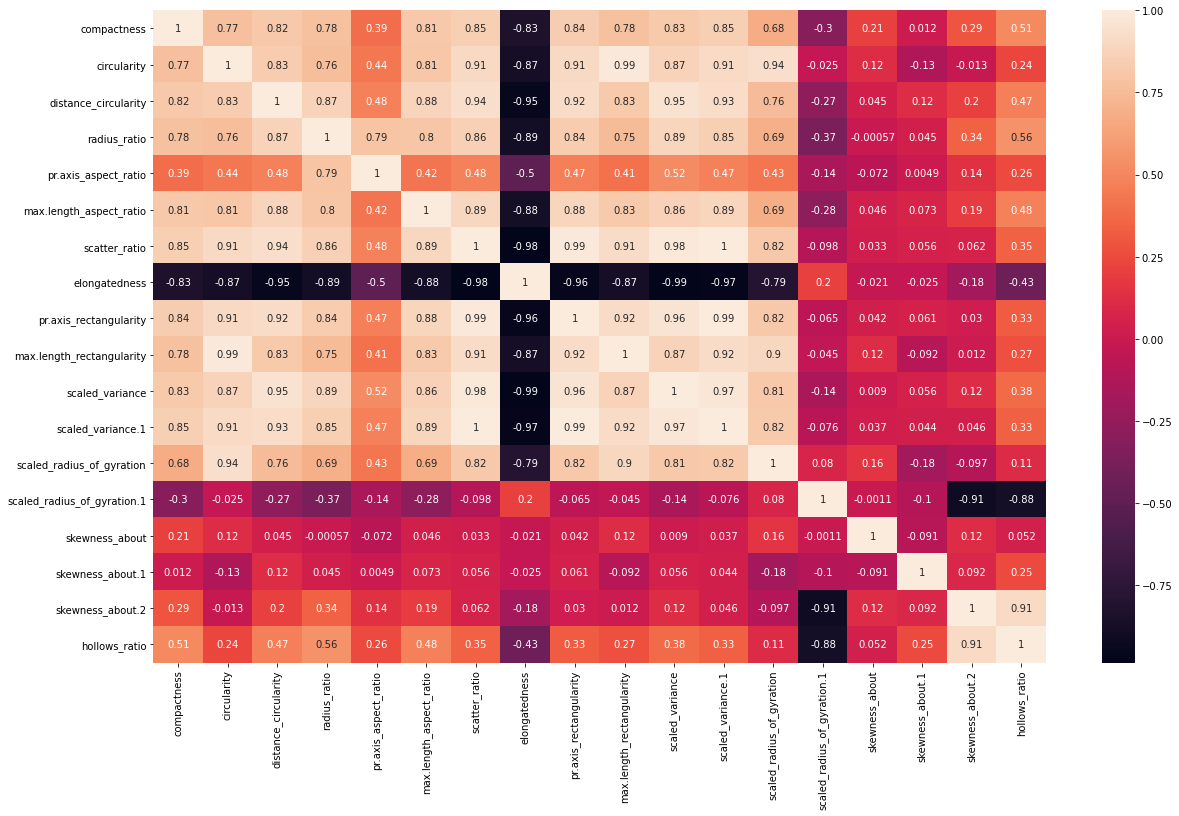

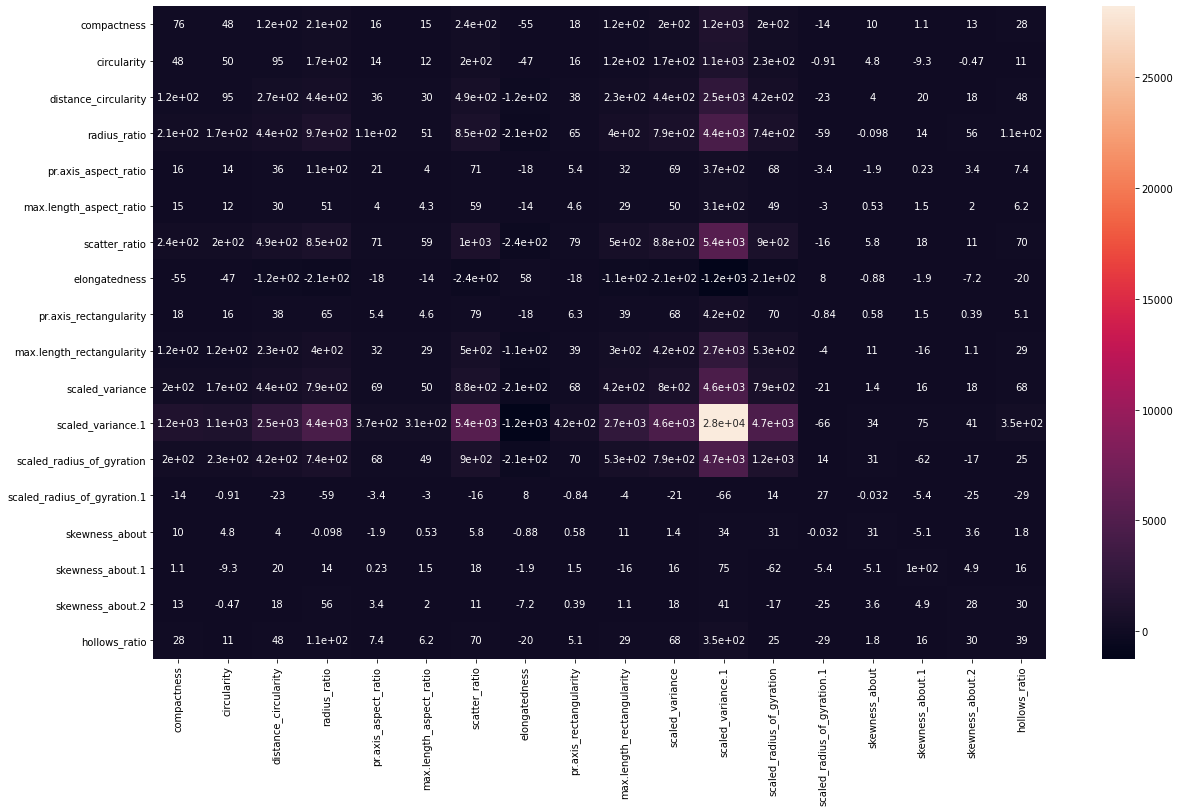

In [22]:
#Correlation plot for Car Class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_car.corr(),annot=True)
plt.show()
plt.close()
#Covariance plot for Car Class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_car.cov(),annot=True)
plt.show()
plt.close()

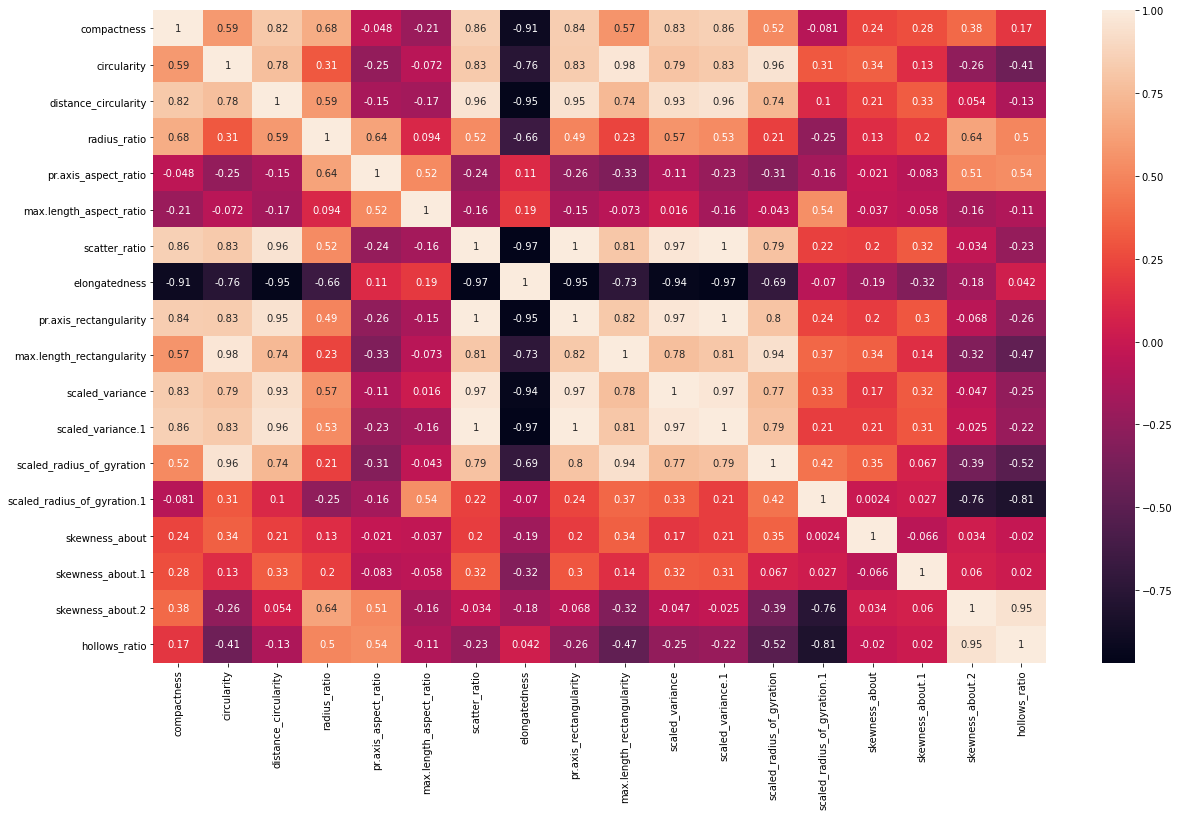

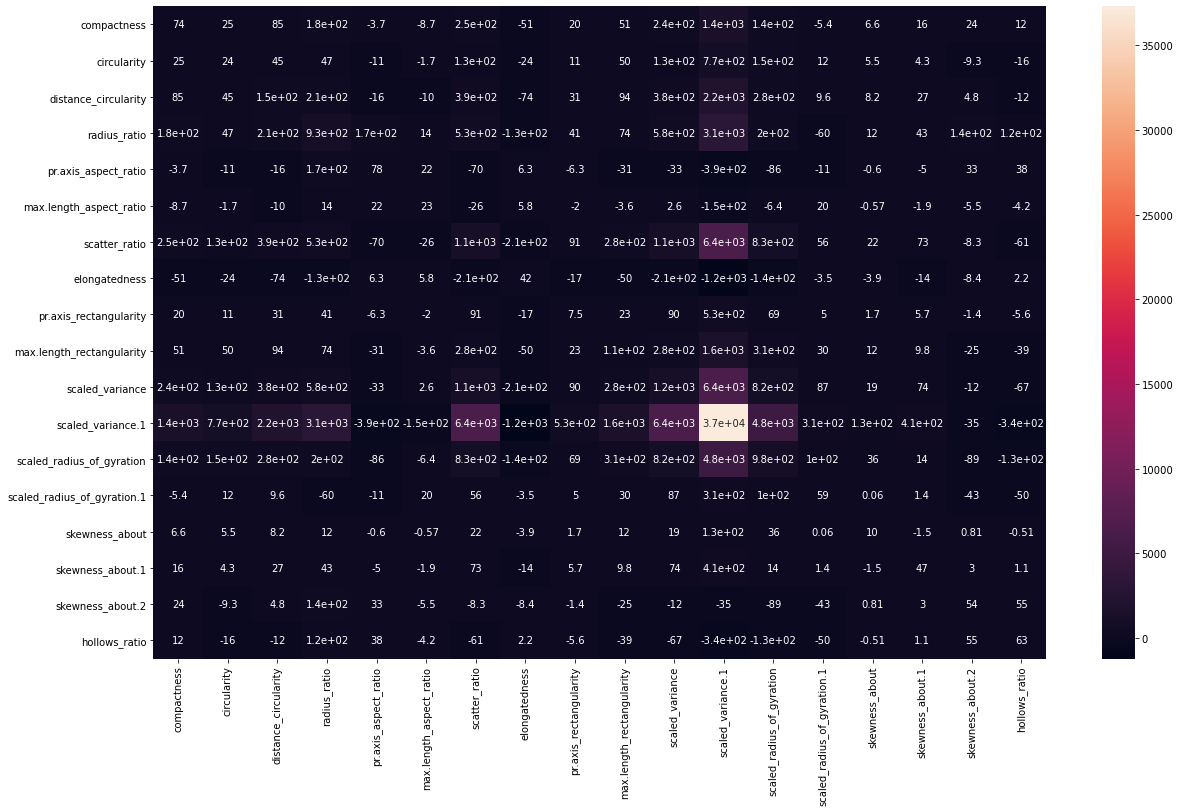

In [23]:
#Correlation plot for Bus Class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.corr(),annot=True)
plt.show()
plt.close()
#Covariance plot for Bus class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.cov(),annot=True)
plt.show()
plt.close()

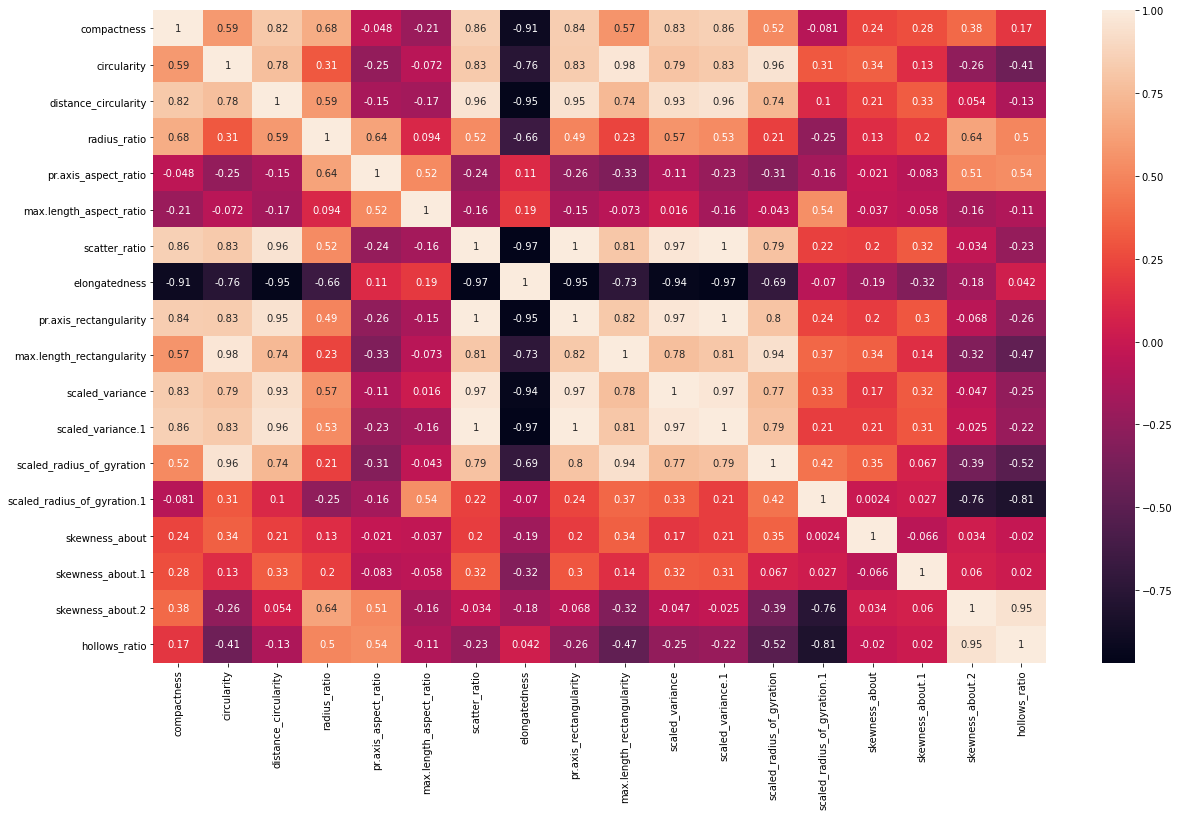

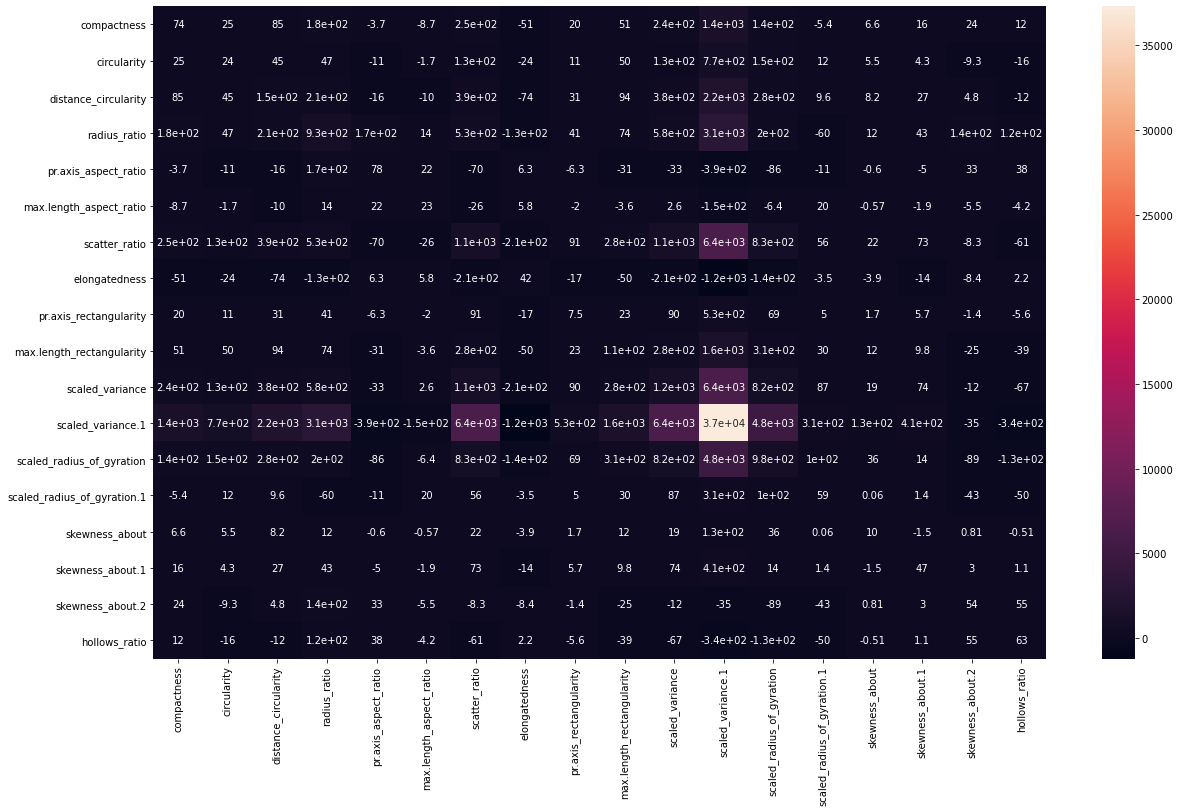

In [24]:
#Correlation plot for van Class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.corr(),annot=True)
plt.show()
plt.close()
#Covariance plot for van class
plt.figure(figsize=(20,12))
sns.heatmap(data_part3_bus.cov(),annot=True)
plt.show()
plt.close()

**Note** : We can see that elongatedness has negative correlation with a lot of other columns and has positive correlation with only a few other columns. It remains to be seen how important those features are important to predict the class of the vehicle.

We can simply drop those data point entries from the table and go ahead.

<AxesSubplot:>

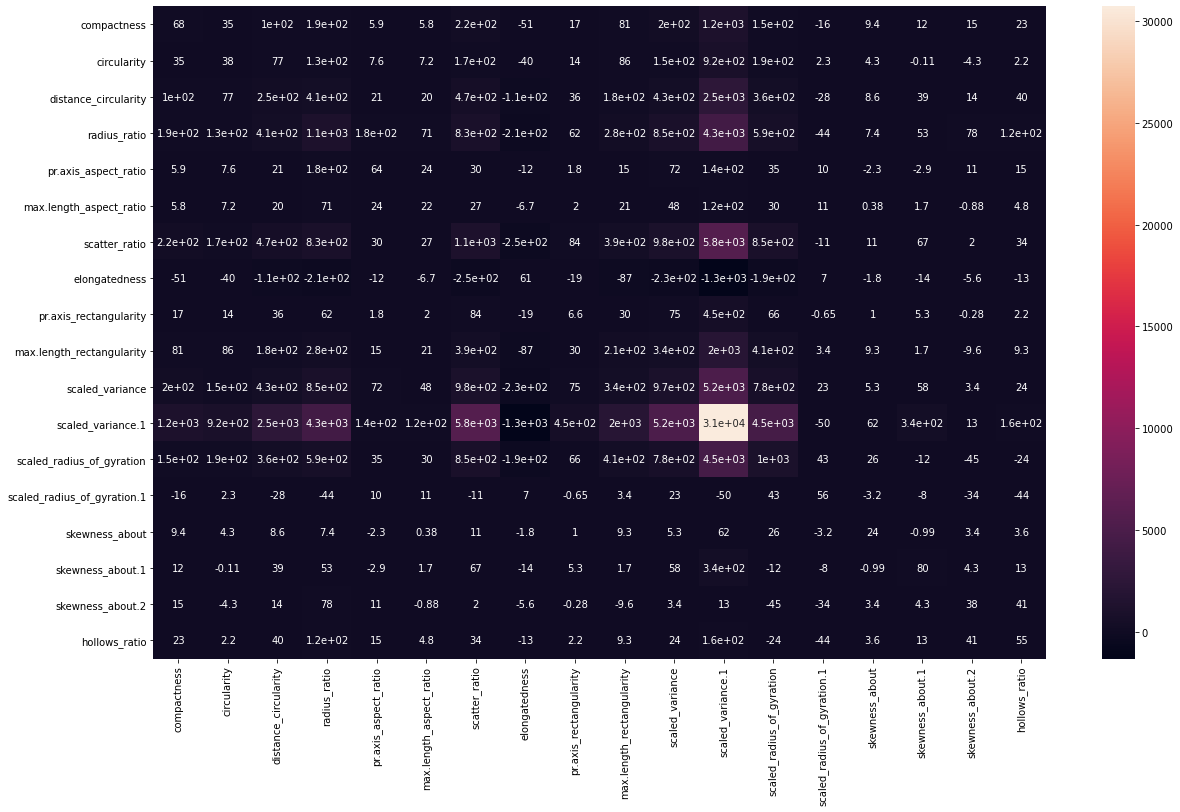

In [25]:
# Entries where there is missing values (NaN) in more than one column. These are to be carefully watched out for or
#or we can replace them with median values or something.
data_part3_copy=data_part3.dropna()
#data_part3_copy.columns

plt.figure(figsize=(20,12))
data_part3_copy_cov=data_part3_copy.cov()
sns.heatmap(data_part3_copy_cov,annot=True)

**Observations:**
Absolute disaster with respect to the covariance observed here. No two components seem to be going together here, except one which is scaled_variance.1. That might turn out to be THE most important feature with respect to prediction of the class of the vehicle. But, let us first transform the data and check if that changes.

In [26]:
from scipy.stats import zscore
data_part3_copy_z=data_part3_copy.apply(zscore)

for no_comp in range(1,19):
    #print(no_comp)
    Pca = PCA(n_components=no_comp)
    Pca.fit(data_part3_copy_z)
    print("\nNumber of Components :",no_comp)
    print("\nVariance Ratio Explained:",Pca.explained_variance_ratio_)


Number of Components : 1

Variance Ratio Explained: [0.52454218]

Number of Components : 2

Variance Ratio Explained: [0.52454218 0.16588564]

Number of Components : 3

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714]

Number of Components : 4

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654]

Number of Components : 5

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654 0.05155287]

Number of Components : 6

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287 ]

Number of Components : 7

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287
 0.01992401]

Number of Components : 8

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287
 0.01992401 0.01233818]

Number of Components : 9

Variance Ratio Explained: [0.52454218 0.16588564 0.10640714 0.06492654 0.05155287 0.0295287
 0.01992401 0.01233818 0.00866117]

Number of

Looks like the number of components is making no difference at all to the amount of ratio that can be explained. So, we fix the no of components to just 7

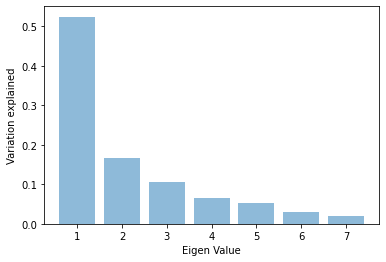

The Total amount of variance that can be explained using 7 Components is: 
96.27670728488329 %


In [27]:
Pca = PCA(n_components=7)
Pca.fit(data_part3_copy_z)
Pca_var=Pca.explained_variance_ratio_
plt.bar(list(range(1,8)),Pca_var,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()
summ=0
print("The Total amount of variance that can be explained using 7 Components is: ")
for values in range(len(Pca_var)):
    summ=summ+Pca_var[values]
print(summ*100,'%')

This is huge amount of explanation that can be obtained out of just 5 or 4 variables variables. Let us stick to thse 7 variables for now.

In [28]:
data_part3_z_transformed=pd.DataFrame(Pca.transform(data_part3_copy_z))
data_part3_z_transformed #Orignal datframe is now transformed using principal component analysis to the 7 components given below

0         1          2         3         4         5         6
0    0.352249 -0.141027   0.961832  0.190872  0.069616 -0.740301 -0.882080
1   -1.578072 -0.422197  -0.365261  0.239334  0.685899 -0.530580  0.345639
2    3.782556  0.253257   0.061756  1.216416  0.717337  0.728388 -0.015941
3   -1.713214 -2.819496   0.186835  0.379588 -0.357389 -0.514101  0.450872
4    0.532165  5.153595  11.400516  0.066717  3.242363 -0.360525  2.569695
..        ...       ...        ...       ...       ...       ...       ...
808 -0.420214 -0.579732   0.197542 -1.445859  1.069931  0.804298 -0.032025
809 -0.295035  0.223473   0.739082 -0.891889 -0.246193 -1.435235 -0.625594
810  4.831130  0.073236   0.489974  0.317896 -1.359239 -0.195120  0.599520
811 -3.269416 -1.018665  -0.343441 -1.927256  0.047640 -0.423563 -0.241143
812 -4.755217  0.307670  -0.582164 -1.226277 -0.052286 -0.348528  0.055336

[813 rows x 7 columns]

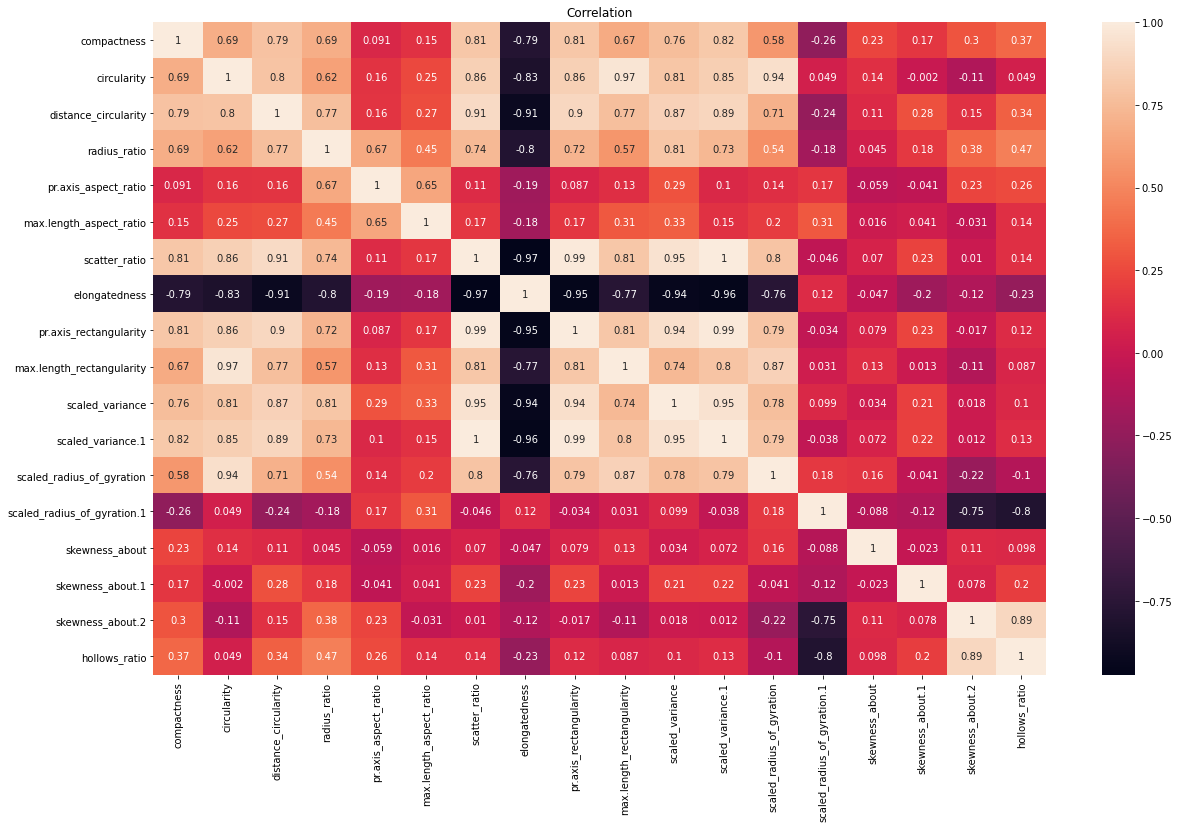

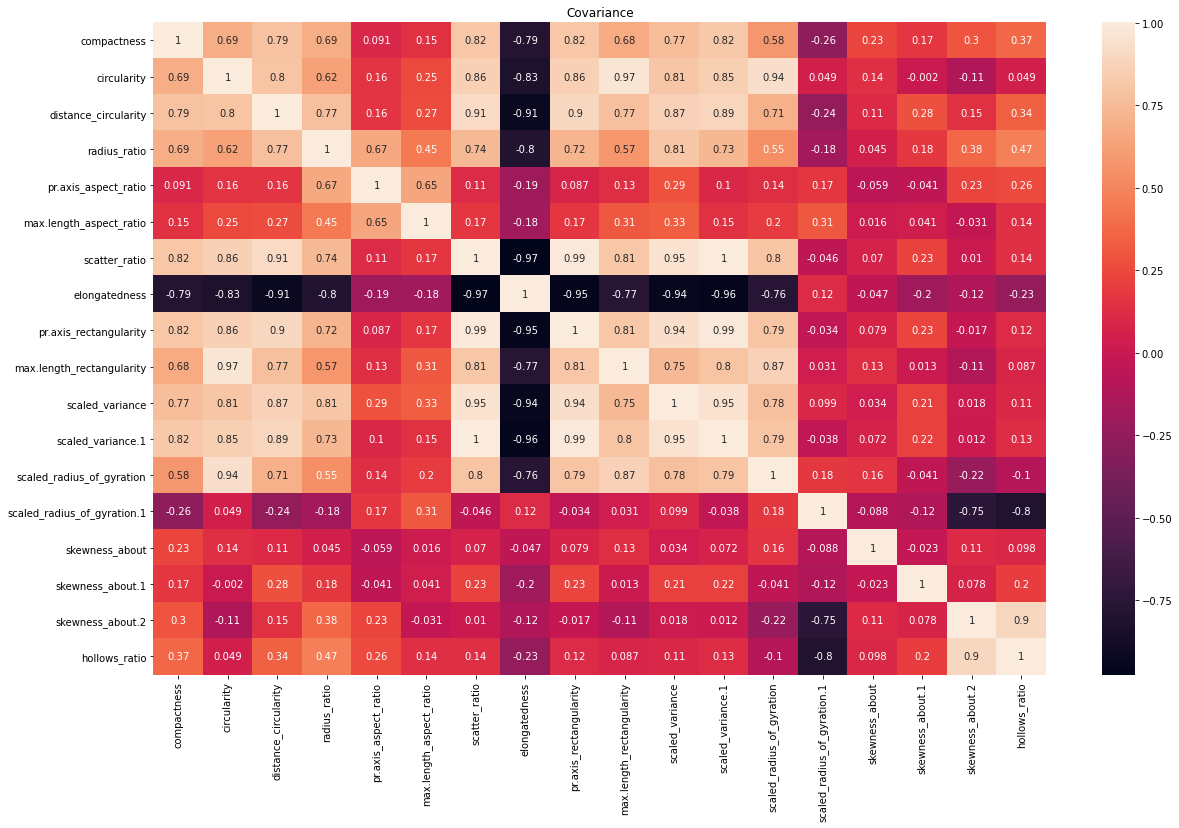

In [29]:
#Plotting the data before the PCA are identified and plotted here.

data_part3_copy_z_corr=data_part3_copy_z.corr()
data_part3_copy_z_cov=data_part3_copy_z.cov()
#Plotting the correlation in the data
plt.figure(figsize=(20,12))
plt.title("Correlation")
sns.heatmap(data_part3_copy_z_corr,annot=True)
plt.show()
plt.close()
#Plotting the covariance in the data
plt.figure(figsize=(20,12))
plt.title("Covariance")
sns.heatmap(data_part3_copy_z_cov,annot=True)
plt.show()
plt.close()

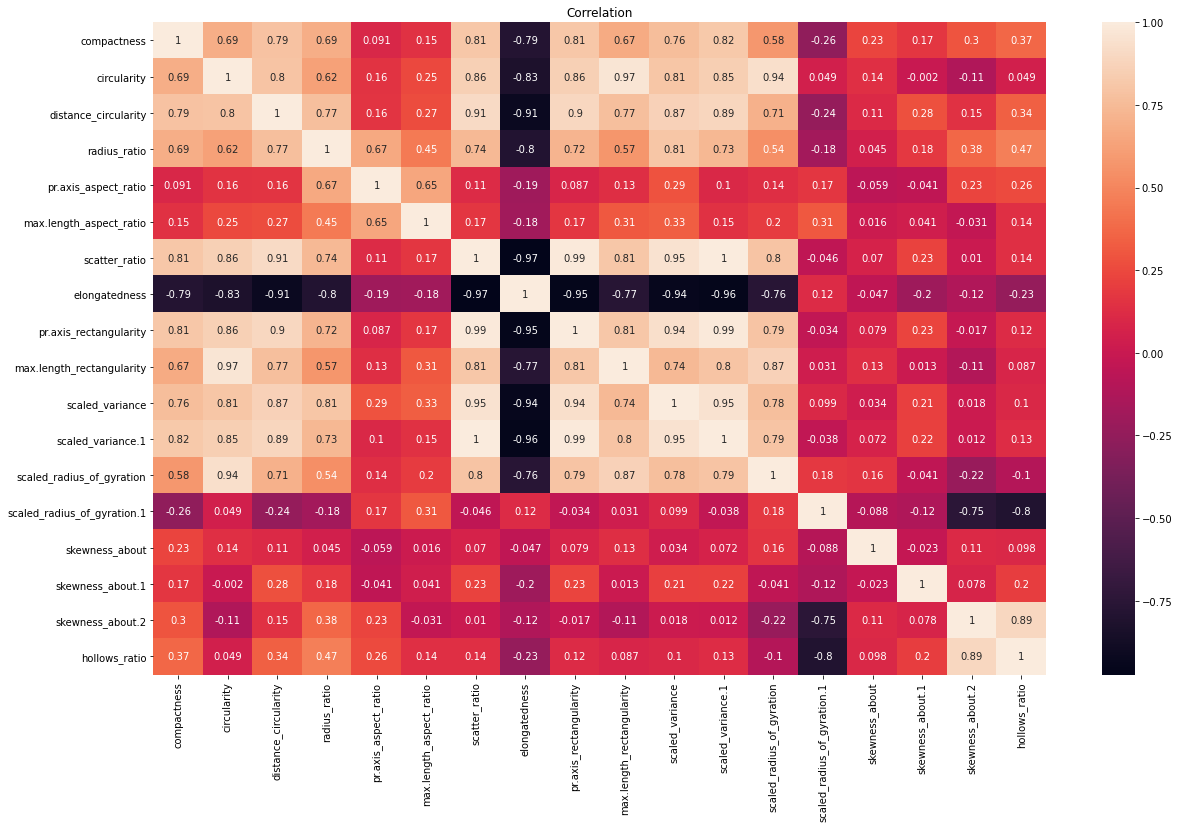

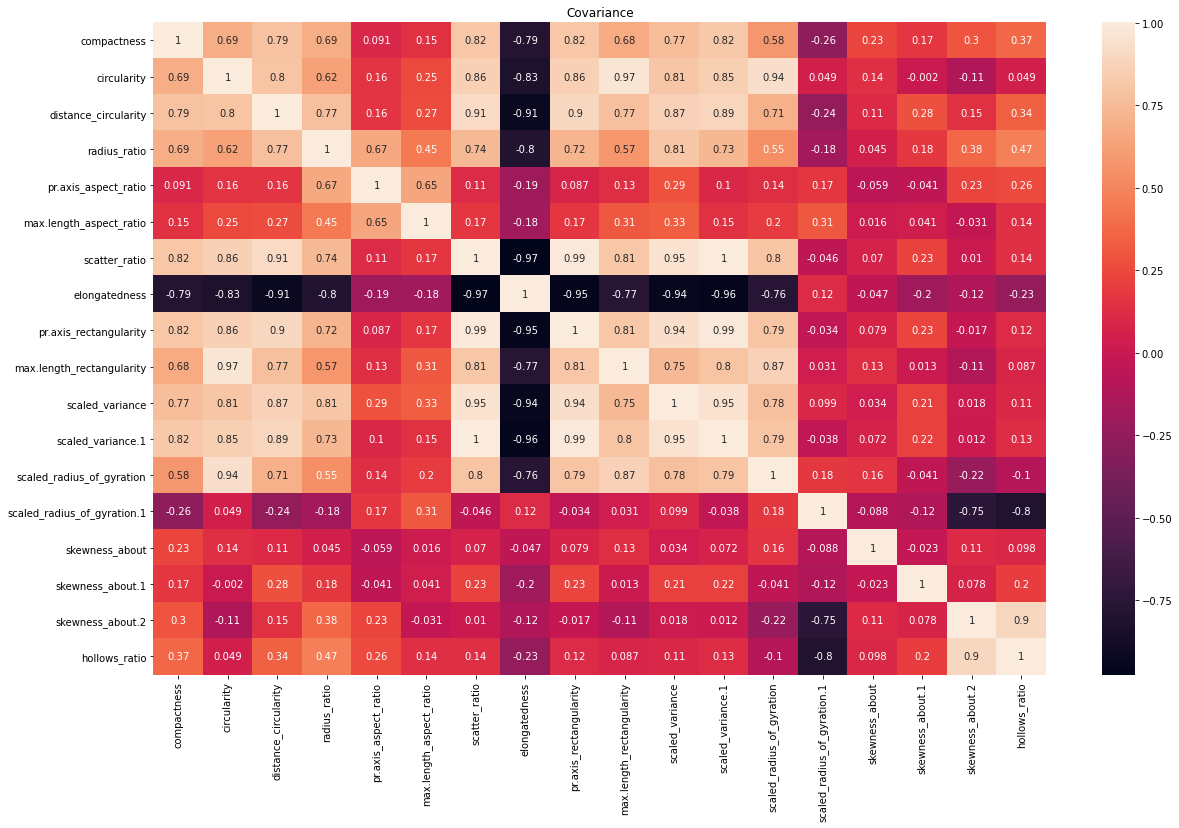

In [30]:
#Correlation and Covariance in scaled and transformed data.
data_part3_z_transformed_corr=data_part3_copy_z.corr()
data_part3_z_transformed_cov=data_part3_copy_z.cov()
#Plotting the Correlation
plt.figure(figsize=(20,12))
plt.title("Correlation")
sns.heatmap(data_part3_z_transformed_corr,annot=True)
plt.show()
plt.close()
#Plotting hte Covariance
plt.figure(figsize=(20,12))
plt.title("Covariance")
sns.heatmap(data_part3_z_transformed_cov,annot=True)
plt.show()
plt.close()
plt.show()

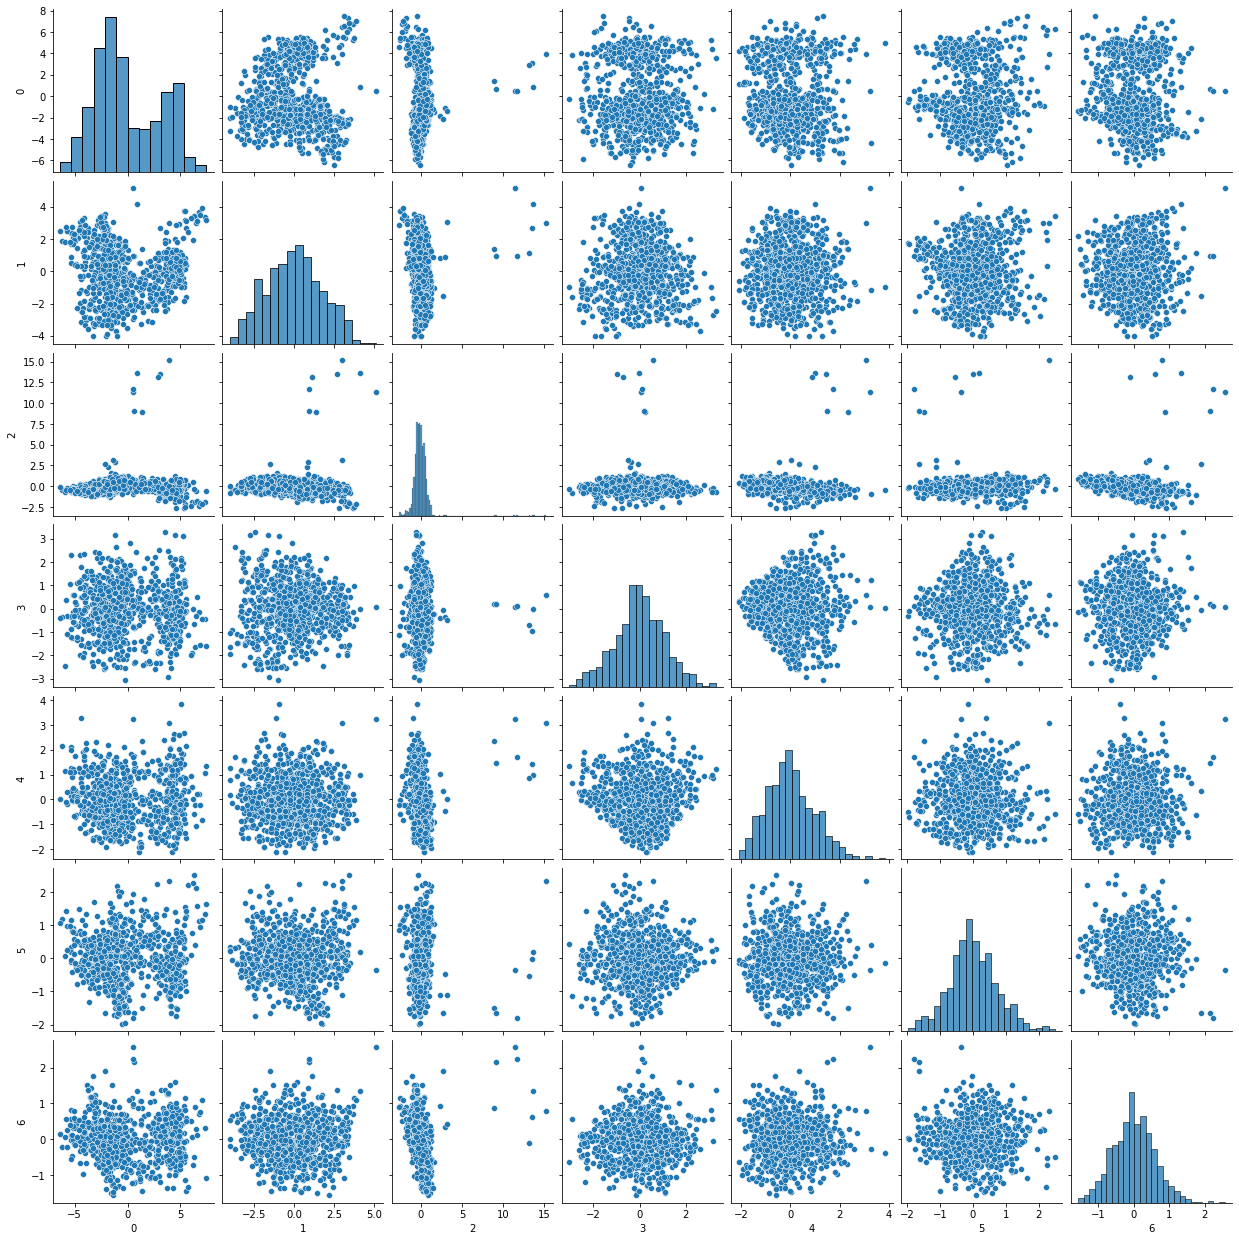

In [31]:
#checking the transformed and scaled data and how they are distributed.
sns.pairplot(data_part3_z_transformed)

**Observation** : 
Note here that almost all the principal components seem to be clustering along one single mean point. But there is one component, viz. component no 2 which is completely distributed and skewed to one particular side with almost all the variables. But most probably because of outliers that this particular trend might be happening, as is visible here in the plots. All the others have promptly fallen into line.

**Note here :** The Correlation and Covariance show no change in the data after transformation just like it shouldn't. Now we can go ahead with model fitting for Support Vector Machine.
After that we can go ahead with setting up a data such that it can take inverse transformation from the given output to check the data.

In [32]:
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
#selecting the model

classifier_svm_z = svm.SVC(gamma=0.025, C=3)
classifier_svm=svm.SVC(gamma=0.025, C=3)

#Test train splitting of the data.

x_trans=data_part3_z_transformed
y_trans=data_part3_NaN["class"]

x=data_part3_copy_z
y=data_part3_NaN["class"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train_trans,x_test_trans,y_train_trans,y_test_trans=train_test_split(x_trans,y_trans,test_size=0.3,random_state=1)

In [33]:
confusion_index=["bus","van","car"]
confusion_columns=["predict bus","predict van","predict car"]

classifier_svm_z.fit(x_train_trans, y_train_trans)
classifier_svm.fit(x_train,y_train)

predict_SVM = classifier_svm.predict(x_test)
confusion_SVM=pd.DataFrame(metrics.confusion_matrix(y_test, predict_SVM),columns=confusion_columns,index=confusion_index)

predict_SVM_trans = classifier_svm_z.predict(x_test_trans)
confusion_SVM_trans=pd.DataFrame(metrics.confusion_matrix(y_test_trans, predict_SVM_trans),columns=confusion_columns,index=confusion_index)

Accuracy_SVM = accuracy_score(y_test, predict_SVM)
Recall_SVM = recall_score(y_test, predict_SVM,average=None)

Accuracy_SVM_trans = accuracy_score(y_test_trans, predict_SVM_trans)
Recall_SVM_trans = recall_score(y_test_trans, predict_SVM_trans,average=None)

support_vector_Testscore=classifier_svm.score(x_test, y_test)
support_vector_Trainscore=classifier_svm.score(x_train, y_train)

support_vector_Testscore_trans=classifier_svm_z.score(x_test_trans, y_test_trans)
support_vector_Trainscore_trans=classifier_svm_z.score(x_train_trans, y_train_trans)

In [34]:
l=pd.DataFrame(y_test)
l[l["class"]=="van"].count()

class    52
dtype: int64

In [35]:
k=pd.DataFrame(predict_SVM)
k[k[0]=="van"].count()




0    56
dtype: int64

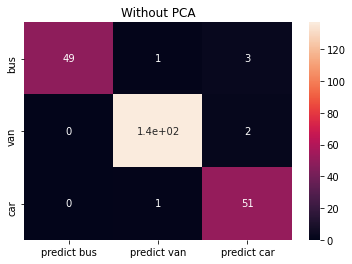

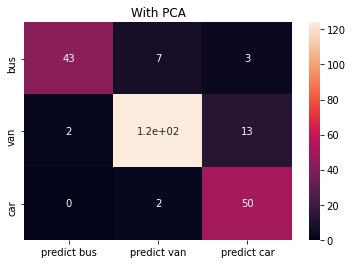

In [36]:
plt.title("Without PCA")
sns.heatmap(confusion_SVM,annot=True)
plt.show()
plt.close()
plt.title("With PCA")
sns.heatmap(confusion_SVM_trans,annot=True)
plt.show()
plt.close()

In [37]:
#Designing a function such that we can use it to tweak and experiment with various features and settings

##############################################################
##############################################################

#############################################################

##############################################################
##############################################################


# This function will give us the dataframe that is scaled according to a chosen method (zscore if nothing is mentioned)
# and gives us the dataframe along with target column with attached principal components.

def df_transformation_w_scaling(dataframe_given,target_column,scaling_method=None,Pca_config=None):
    if Pca_config==None:
        from skleran.decomposition import PCA
        Pca_config=PCA(n_components=3)
    if scaling_method==None:
        from scipy.stats import zscore
        scaling_method=zscore
    if target_column in dataframe_given.columns:
        temp_x=dataframe_given.drop([target_column],axis=1)
        temp_y=dataframe_given[target_column]
    else :
        temp_x=dataframe_given
        temp_y=target_column
        #Not dealing with exceptions here.
    dataframe_out=temp_x.apply(scaling_method)
    Pca_config.fit(dataframe_out)
    dataframe_out=pd.DataFrame(Pca_config.transform(dataframe_out),index=dataframe_given.index)
    dataframe_out[target_column]=temp_y
    return Pca_config,dataframe_out
#########################################################################33
##########################################################################3

##########################################################################

###########################################################################3
###########################################################################3

# This functions lets us give a classifier as an input 
#Function to convert given data into model parameters for verfication.

def Model_info_of_data(given_df,target_df,classifier):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    x=given_df
    y=target_df
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
    classifier.fit(x_train,y_train)
    predict_classifier = classifier.predict(x_test)
    confusion_classifier=metrics.confusion_matrix(y_test, predict_classifier)
    Accuracy_classifier = accuracy_score(y_test, predict_classifier)
    Recall_classifier = recall_score(y_test, predict_classifier,average=None)
    classifier_Testscore=classifier.score(x_test, y_test)
    classifier_Trainscore=classifier.score(x_train, y_train)
    return pd.DataFrame(confusion_classifier,columns=confusion_columns,index=confusion_index),Accuracy_classifier,pd.DataFrame(Recall_classifier),classifier_Testscore,classifier_Trainscore

################################################################
###############################################################

###############################################################

#################################################################
#################################################################
#This will generate our final function that is nice to look at and clearly legible for taking decisions.

def final_product_func(Dataframe_in,target_col,Models_list,no_of_comp=3,Transform=True):
    Model={} #Where the data is collected got comparison
    Pca_config_chosen=PCA(n_components=no_of_comp)
    if Transform:
        scaled_transformed=df_transformation_w_scaling(Dataframe_df,target_column=target_column_chosen,Pca_config=Pca_config_chosen)[1] #This is the cream product i.e. the actual transformed dataframe.
        x=scaled_transformed.drop([target_column_chosen],axis=1)
        y=scaled_transformed[target_column_chosen]
    else:
        if type(target_col)==str:
            x=Dataframe_in.drop([target_col],axis=1)
            y=Dataframe_in[target_col]
        else:
            x=Dataframe_in
            y=target_col       
    for value in range(len(Models_list)):
        Model_info=Model_info_of_data(x,y,classifier=Models_list[value])
        Model.update({Models_list[value] : Model_info})
    return Model


################################################################
###############################################################

###############################################################

#################################################################
#################################################################
#We can add multiple models into this list and extend a loop that will give us proper classifier for the given data.
# Adding one more Model here.

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

classifier_svm=svm.SVC(gamma=0.025, C=3)
decision_tree=DecisionTreeClassifier(criterion = 'entropy')

Models=[classifier_svm,decision_tree]
target_column_chosen="class" # Our column of interest for Classification learning problem
Dataframe_df=data_part3_NaN # Dataframe supplied without NaN values in it (either removed or properly processed.)
no_of_components=6 #Choose the Number of Pricipal components here.
final_product_in=final_product_func(Dataframe_df,target_column_chosen,no_of_comp=no_of_components,Models_list=Models)
final_product_out_z=pd.DataFrame(final_product_in,index=["Confusion_Matrix","Accuracy","Recall","Test_score","Train_score"])


In [38]:
# Model fitting with the PCA Transformation done.
final_product_out_z 

SVC(C=3, gamma=0.025)  \
Confusion_Matrix       predict bus  predict van  predict car
bus...   
Accuracy                                                   0.881148   
Recall                        0
0  0.830189
1  0.863309
2  0.980769   
Test_score                                                 0.881148   
Train_score                                                0.894552   

                        DecisionTreeClassifier(criterion='entropy')  
Confusion_Matrix       predict bus  predict van  predict car
bus...  
Accuracy                                                    0.82377  
Recall                        0
0  0.849057
1  0.834532
2  0.769231  
Test_score                                                  0.82377  
Train_score                                                     1.0

Now Let us check what is going to be difference if we don't do PCA for the very same configurations and so.

In [39]:
#Model fitting without the PCA transformation done.
from scipy.stats import zscore
Dataframe_df_2=data_part3_NaN.drop([target_column_chosen],axis=1).apply(zscore) #This only produces the dataframe that is properly scaled but is not transformed using PCA.
#target_column_chosen=data_part3_NaN[target_column_chosen]

final_product_2=final_product_func(Dataframe_df_2,data_part3_NaN[target_column_chosen],Models_list=Models,Transform=True)


final_product_out_wz=pd.DataFrame(final_product_2,index=["Confusion_Matrix","Accuracy","Recall","Test_score","Train_score"])
final_product_out_wz

SVC(C=3, gamma=0.025)  \
Confusion_Matrix       predict bus  predict van  predict car
bus...   
Accuracy                                                   0.713115   
Recall                        0
0  0.641509
1  0.741007
2  0.711538   
Test_score                                                 0.713115   
Train_score                                                0.741652   

                        DecisionTreeClassifier(criterion='entropy')  
Confusion_Matrix       predict bus  predict van  predict car
bus...  
Accuracy                                                   0.729508  
Recall                        0
0  0.660377
1  0.812950
2  0.576923  
Test_score                                                 0.729508  
Train_score                                                     1.0

In [40]:
final_product_out_z - final_product_out_wz

SVC(C=3, gamma=0.025)  \
Confusion_Matrix       predict bus  predict van  predict car
bus...   
Accuracy                                                   0.168033   
Recall                        0
0  0.188679
1  0.122302
2  0.269231   
Test_score                                                 0.168033   
Train_score                                                  0.1529   

                        DecisionTreeClassifier(criterion='entropy')  
Confusion_Matrix       predict bus  predict van  predict car
bus...  
Accuracy                                                   0.094262  
Recall                        0
0  0.188679
1  0.021583
2  0.192308  
Test_score                                                 0.094262  
Train_score                                                     0.0

**Observation**:
The Accuracy of the model definitely improved a lot. PCA done model seems to be be performing well with respect to test score and trainscore.

In [41]:
pd.DataFrame(final_product_out_wz.loc["Confusion_Matrix"].loc[Models[0]]) 
#Confusion Matrix for the data without PCA, but with zscore scaling for Support Vector Model

predict bus  predict van  predict car
bus           34           10            9
van            6          103           30
car            8            7           37

In [42]:
pd.DataFrame(final_product_out_wz.loc["Confusion_Matrix"].loc[Models[1]])
#Confusion Matrix for the data without PCA, but with Zscore scaling for DecisionTreeClassifier

predict bus  predict van  predict car
bus           35            9            9
van            5          113           21
car            4           18           30

In [43]:
pd.DataFrame(final_product_out_z.loc["Confusion_Matrix"].loc[Models[0]])
#Confusion Matrix for the data with PCA applied for Support Vector Model

predict bus  predict van  predict car
bus           44            6            3
van            3          120           16
car            0            1           51

In [44]:
pd.DataFrame(final_product_out_z.loc["Confusion_Matrix"].loc[Models[1]])
#Confusion Matrix for the data with PCA applied for DecisionTreeClassifier

predict bus  predict van  predict car
bus           45            5            3
van            8          116           15
car            4            8           40

# Notes and Observations :

There is an obvious improvement in the test score and train score of the given data. It is visible in the above two cells which is very much different. But as the no of data points changes, most probably they do change the scoring on the models. There is approximately 10% performance boost due to dimensionality reduction.